In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
pwd_data = pd.read_csv("https://www.cs.cmu.edu/~keystroke/DSL-StrongPasswordData.csv", header=0)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier


<ipython-input-4-c477270c4184>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['subject'] = pwd_data['subject'].values


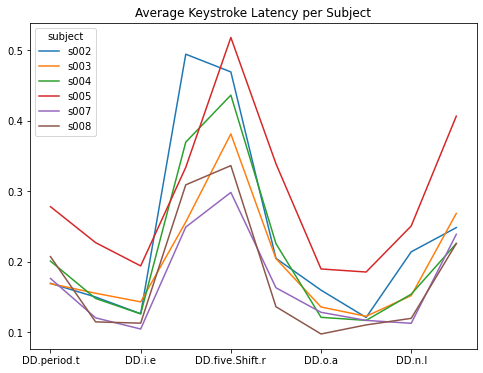

In [4]:
DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
plot = pwd_data[DD]
plot['subject'] = pwd_data['subject'].values
plot = plot.groupby('subject').mean()
plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')

In [5]:
data_train, data_test = train_test_split(pwd_data, test_size = 0.2, random_state=0)
X_train = data_train[pwd_data.columns[2:]]
y_train = data_train['subject']
X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

In [6]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

/root/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [9]:
# Make predictions for each model
y_pred_knc = knc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_mlpc = mlpc.predict(X_test)

In [10]:
knc_accuracy = metrics.accuracy_score(y_test, y_pred_knc)

In [11]:
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)

In [12]:
mlpc_accuracy = metrics.accuracy_score(y_test, y_pred_mlpc)

In [13]:
labels = list(pwd_data['subject'].unique())
cm = confusion_matrix(y_test, y_pred_mlpc, labels)

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=['s002', 's003', 's004', 's005', 's007', 's008', 's010', 's011', 's012', 's013', 's015', 's016', 's017', 's018', 's019', 's020', 's021', 's022', 's024', 's025', 's026', 's027', 's028', 's029', 's030', 's031', 's032', 's033', 's034', 's035', 's036', 's037', 's038', 's039', 's040', 's041', 's042', 's043', 's044', 's046', 's047', 's048', 's049', 's050', 's051', 's052', 's053', 's054', 's055', 's056', 's057'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'True')

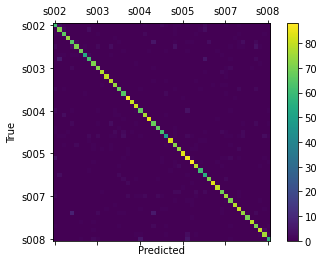

In [14]:
figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [15]:
print("K-Nearest Neighbors Classifier:", knc_accuracy)
print("SVC Classifier:", svc_accuracy)
print("Multi-Layer Perceptron Classifier:", mlpc_accuracy)

K-Nearest Neighbors Classifier: 0.3730392156862745
SVC Classifier: 0.7629901960784313
Multi-Layer Perceptron Classifier: 0.9071078431372549
